# Workshop #2 - Simple Data Transformations

This week we'll look on visualizing our data. Although numbers can tell us a satisfying story, a visual of our data will allow us to easily identify trends (and will look amazing on a presentation \*hint\* \*hint\*).

If you came from the R version of this workshop and wish to use ggplot's tools, there is an excellent Python implimentation of ggplot which uses the same functions: http://ggplot.yhathq.com/how-it-works.html.

## A few ground rules

 - Remember to run every cell.
     - Parts of this workshop won't work if this condition isn't met.
 - Please don't change my asserts.
     - If you're receiving an incorrect answer please don't change the assert answer just to get it right. You            won't learn anything and will probably fail the rest of the tutorial. Feel free to message slack on the #workshops channel if you get stuck.

In [120]:
%matplotlib inline
#Don't mind this. I'm just trying to double check you work :)
def assertAns(condition, fail_str, suc_str):
    assert condition, fail_str
    print(suc_str)

In [121]:
import numpy as np #Linear algebra
import requests as req #Python's http library
import re #Python's Regex library
import pandas as pd #Python's data manipulation library
import matplotlib.pyplot as plt #Python's graphing library
import seaborn as sns #A graphing library for heatmaps

Lets start by importing the dataframe from last week's workshop (recall the pickle file)! The dataframe should saved in this path: `"../saved_dataframes/workshop1RainfallDF"`

In [122]:
timeHourRainfallDF = pd.read_pickle(<FILL IN>)
timeHourRainfallDF.head()

,id,name,date,rainfall,time,hour
0,7677,RG_001,2017-06-01T00:00:00,0.0,00:00:00,00
1,7677,RG_001,2017-06-01T00:05:00,0.0,00:05:00,00
2,7677,RG_001,2017-06-01T00:10:00,0.0,00:10:00,00
3,7677,RG_001,2017-06-01T00:15:00,0.0,00:15:00,00
4,7677,RG_001,2017-06-01T00:20:00,0.0,00:20:00,00


### MatplotLib Basics

MatplotLib is a useful library to view your data as a graph. This is a pretty expansive library and includes basically all types of graphs known to man (and most definitely everything you've learned in a stats course).

Lets start by plotting __the amount of rain by the time of day.__

We'll start off by making two arrays, one to represent the x-values and the other the y-values.

In [123]:
x = timeHourRainfallDF["time"].unique()
y = timeHourRainfallDF["rainfall"].values #The values() function will return all the values of the column as a list.

Now lets print out `x` and `y` to see how they look like.

In [124]:
print(<FILL IN>)
<FILL IN>

['00:00:00' '00:05:00' '00:10:00' '00:15:00' '00:20:00' '00:25:00'
 '00:30:00' '00:35:00' '00:40:00' '00:45:00' '00:50:00' '00:55:00'
 '01:00:00' '01:05:00' '01:10:00' '01:15:00' '01:20:00' '01:25:00'
 '01:30:00' '01:35:00' '01:40:00' '01:45:00' '01:50:00' '01:55:00'
 '02:00:00' '02:05:00' '02:10:00' '02:15:00' '02:20:00' '02:25:00'
 '02:30:00' '02:35:00' '02:40:00' '02:45:00' '02:50:00' '02:55:00'
 '03:00:00' '03:05:00' '03:10:00' '03:15:00' '03:20:00' '03:25:00'
 '03:30:00' '03:35:00' '03:40:00' '03:45:00' '03:50:00' '03:55:00'
 '04:00:00' '04:05:00' '04:10:00' '04:15:00' '04:20:00' '04:25:00'
 '04:30:00' '04:35:00' '04:40:00' '04:45:00' '04:50:00' '04:55:00'
 '05:00:00' '05:05:00' '05:10:00' '05:15:00' '05:20:00' '05:25:00'
 '05:30:00' '05:35:00' '05:40:00' '05:45:00' '05:50:00' '05:55:00'
 '06:00:00' '06:05:00' '06:10:00' '06:15:00' '06:20:00' '06:25:00'
 '06:30:00' '06:35:00' '06:40:00' '06:45:00' '06:50:00' '06:55:00'
 '07:00:00' '07:05:00' '07:10:00' '07:15:00' '07:20:00' '07:25

Hmmm that's annoying. Notice how the values of `x` are all strings. Unfortunately Matplotlib doesn't really like to use non-primitive types as a graph axis. We'll have to represent these strings with a continuous variable for Matplotlib to plot the points.

In [175]:
#Lets get the values of x in the form of a list.
uniqueTimes = x
uniqueTimes = list(uniqueTimes)
print("type of the variable x: "+ str(type(x)))
print("type of the variable uniqueTimes: "+ str(type(uniqueTimes)))

type of the variable x: <class 'numpy.ndarray'>
type of the variable uniqueTimes: <class 'list'>


In [185]:
#Here I am looping through each unique time and using its index as a unique continuous variable.
for index,row in timeHourRainfallDF.iterrows():
    timeHourRainfallDF.set_value(index,'timeIndex', uniqueTimes.index(row["time"]))

ValueError: '00:00:00' is not in list

In [127]:
timeHourRainfallDF.head()

,id,name,date,rainfall,time,hour,timeIndex
0,7677,RG_001,2017-06-01T00:00:00,0.0,00:00:00,00,0.0
1,7677,RG_001,2017-06-01T00:05:00,0.0,00:05:00,00,1.0
2,7677,RG_001,2017-06-01T00:10:00,0.0,00:10:00,00,2.0
3,7677,RG_001,2017-06-01T00:15:00,0.0,00:15:00,00,3.0
4,7677,RG_001,2017-06-01T00:20:00,0.0,00:20:00,00,4.0


Now lets overwrite our `x` variable with the _values_ of the _timeIndex_ column from the `timeHourRainfallDF`.

In [128]:
x = <FILL IN>

Now lets construct our graph.

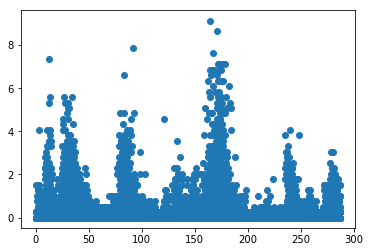

In [129]:
plt.scatter(x,y)

Hmm that's a bit small. lets increase it by inserting `plt.rcParams["figure.figsize"] = "18, 13"` before we tweak the font.

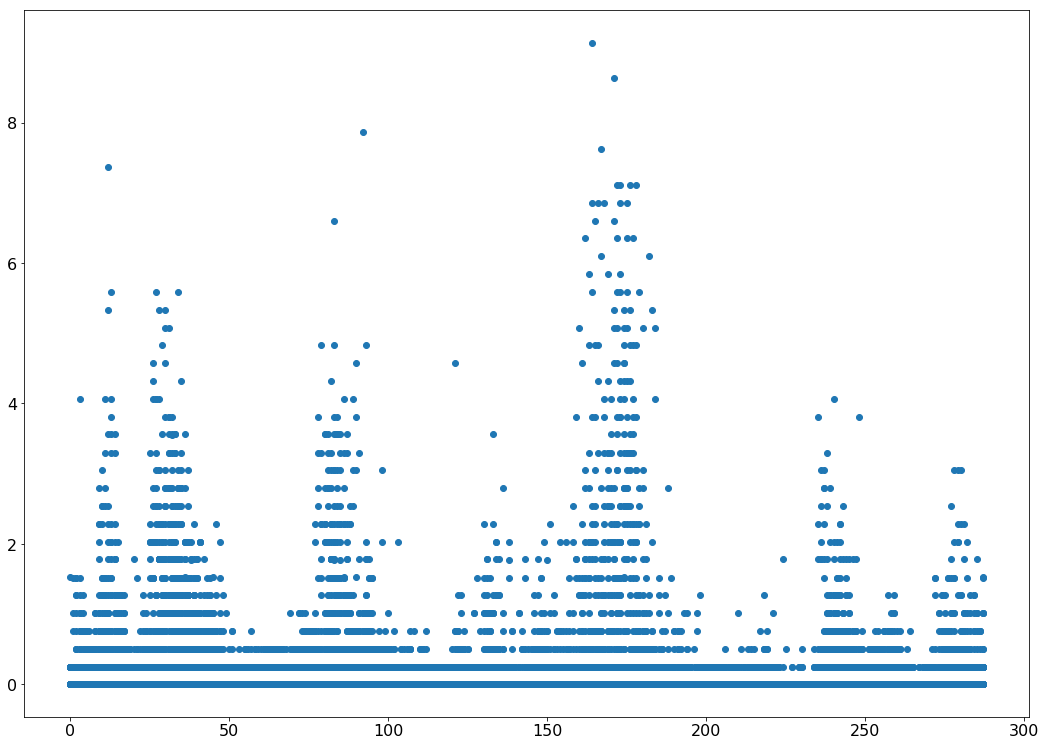

In [168]:
<FILL IN>
font = {'size': 16} #You can tweak around with the font params to make them prettier.
plt.rc('font', **font) #Note: You only need to modify font global variables once and your changes will persist.
plt.scatter(x,y)

We can also set lables for the table. Set the _title_ for the grapph as `"24-Hour Rainfall"`, the _xlabel_ as `"Time of Day"`, and the _ylabel_ as `"Amount of Rainfall (mm)"`.

In [184]:
plt.title(<FILL IN>)
plt.xlabel(<FILL IN>)
plt.ylabel(<FILL IN>)
plt.rcParams["figure.figsize"] = "18, 13"
plt.scatter(x,y)

SyntaxError: invalid syntax (<ipython-input-184-354336c62fca>, line 1)

You can save your graphs by right-clicking on the image and select _save as_. You can also preview them as larger images by right-clicking and opening your graph in a new tab.

To be honest I wasn't expecting spikes as clear as the ones shown above. And that's the beauty of graphing! It allows you to visually see patterns you might miss. Here you can clearly see when it rains the most and least in Toronto.

One of my favourite things to do is to plot two different variables against each other and look at their correlation (http://www.statisticshowto.com/what-is-correlation/). This will allow us to see which pairs of variables seem to have the most correlation with each other.

In [172]:
#Lets define a function to make correlation matrices!
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 })

Can you pass the `timeHourRainfallDF` into the `plot_correlation_map()` function?

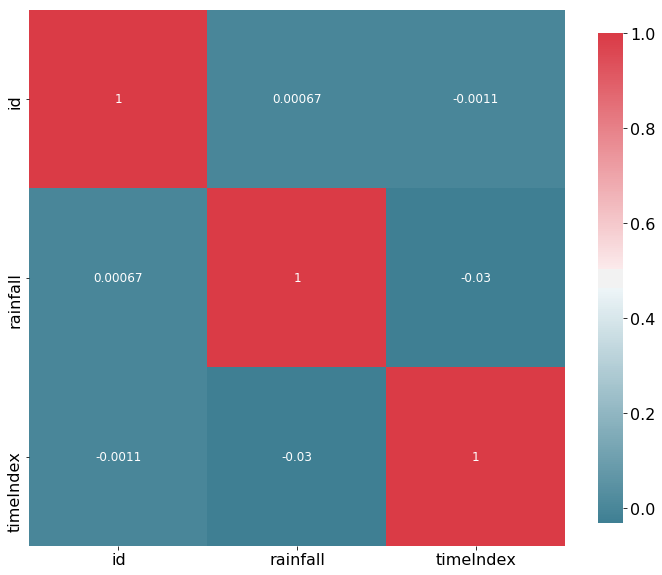

In [173]:
plot_correlation_map(<FILL IN>)

As expected, most variables in our dataset doesn't really correlate with one another. Afterall, it's hard to see how rainfall will influence the time index. You will notice how every variable is 100% correlated with itself (which makes sense). To generate this correlation graph we were calculating the covariance against each variable. Something you can learn more about here: http://www.wikihow.com/Calculate-Covariance.

Now that we have some prerequsite knowledge on how to plot and graph in Python, lets try to visualize something more challenging. I want us to __plot downpours of rain on top of a map of Toronto.__

Lets start by importing the data we want to use. 

In [134]:
datalist = []
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201701.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201702.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201703.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201704.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201705.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201706.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201701.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201702.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201703.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201704.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201705.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201706.csv"))

lets see what kind of data we've imported into our datalist. Run the `head()` function onto the _0th_ index of `datalist`.

In [135]:
<FILL IN>

,id,name,date,rainfall
0,7687,RG_016,2017-01-01T00:00:00,0.0
1,7687,RG_016,2017-01-01T00:05:00,0.0
2,7687,RG_016,2017-01-01T00:10:00,0.0
3,7687,RG_016,2017-01-01T00:15:00,0.0
4,7687,RG_016,2017-01-01T00:20:00,0.0


In [136]:
datalist[5].head()

,id,name,date,rainfall
0,7677,RG_001,2017-06-01T00:00:00,0.0
1,7677,RG_001,2017-06-01T00:05:00,0.0
2,7677,RG_001,2017-06-01T00:10:00,0.0
3,7677,RG_001,2017-06-01T00:15:00,0.0
4,7677,RG_001,2017-06-01T00:20:00,0.0


In [137]:
datalist[6].head()

,id,name,longitude,latitude
0,7677,RG_001,-79.478112,43.647680
1,7678,RG_002,-79.443616,43.651196
2,7679,RG_003,-79.405094,43.656616
3,7680,RG_004,-79.402833,43.678343
4,7681,RG_006,-79.375101,43.661265


In [138]:
datalist[11].head()

,id,name,longitude,latitude
0,7677,RG_001,-79.478112,43.647680
1,7678,RG_002,-79.443616,43.651196
2,7679,RG_003,-79.405094,43.656616
3,7680,RG_004,-79.402833,43.678343
4,7681,RG_006,-79.375101,43.661265


Since we imported the packages together, we know that the data from indexes 0-5 contains the rainfall data and that indexes 6-11 contains the geographical data.<br>_Note: We could also have inferred this from the code we used to import our data, but it's always good to check!_

Lets combine the dataframes 0-5 into one giant _rainfallDF_ and dataframes 6-11 into one giant _geoDataDF_

In [139]:
rainfallDF = datalist[0].append(datalist[1]).append(datalist[2]).append(datalist[3]).append(datalist[4]).append(datalist[5])
geoDataDF = datalist[6].append(datalist[7]).append(datalist[8]).append(datalist[9]).append(datalist[10]).append(datalist[11])

Lets see how large each DF is

In [140]:
print("length of rainfallDF: " + str(len(rainfallDF)))
print("length of geoDataDF: " + str(len(geoDataDF)))

length of rainfallDF: 1807014
length of geoDataDF: 276


It looks like these two dataframes describes different datasets (because the number of rows don't match up).

Yet if we looked at the _README_ for the dataset (https://goo.gl/gBYrb4), we'll realize that the values within `rainfallDF` describes the rain guage readings while the `geoDataDF` describes the locations of those rain guage stations.

So lets print the number of stations that have a unique _name_ from `rainfallDF` and `geoDataDF` just to make sure that they both describe the same set of stations.

In [141]:
print("length of unique station names in rainfallDF: " + str(len(rainfallDF["name"].unique())))
print("length of unique ids in geoDataDF: " + str(len(geoDataDF["name"].unique())))

length of unique station names in rainfallDF: 45
length of unique ids in geoDataDF: 46


It seems like there is one more station location described in the geoDataDF than in the rainfallDF. This probably means that a new station was built but no readings have been recorded yet. Nonetheless, we have enough station locations to correspond each rainfall reading with the location from which it was read from. You may have noticed that every name in the geoDataDF describes the location of one geo station. Each station has many readings and their readings are recorded in the rainfallDF.

Now that we have a better understanding of the data within our two datasets, lets try to match up every rainfall reading with the lat lon of every station. This will give each rainfall reading a coordinate which we can use to plot on a map!

To match each rain guage reading with its corresponding station we'll have the `merge()` the two datasets on the _name_ column. This means every row in `rainfallDF` will have 2 extra attributes that describes its corresponding _lat lon_ location. If you're using multiple dataframes in your analysis remember that this function exists!

We'll use the Pandas `merge()` function to join the dataframes by the _name_ column.

In [142]:
geoRainfallDFPoorColumns = rainfallDF.merge(geoDataDF, left_on='name', right_on='name', how='outer')
geoRainfallDFPoorColumns.head()

,id_x,name,date,rainfall,id_y,longitude,latitude
0,7687.0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
1,7687.0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
2,7687.0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
3,7687.0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
4,7687.0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125


In [143]:
geoRainfallDFPoorColumns.drop(['id_x'], axis = 1, inplace = True, errors = 'ignore')
# errors = 'ignore' means that if the id_x column doesn't exist this won't error.
geoRainfallDFPoorColumns.head()

,name,date,rainfall,id_y,longitude,latitude
0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
1,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
2,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
3,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
4,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125


Since we're going to use this dataframe for future workshops, lets fix up the columns, specifically id_y. Lets rename it to just id and move this column to the left most index of the dataframe. 

In [144]:
#This makes it so that if your decide to re-run this cell then the columns will still be "disorganized".
geoRainfallDF = geoRainfallDFPoorColumns

#Lets set the name of the columns.
geoRainfallDF.columns = ['name', 'date', 'rainfall', 'id', 'longitude', 'latitude']

#Lets re-roder the id column. Doesn't it look familiar?
geoRainfallDF = geoRainfallDF[['id', 'name', 'date', 'rainfall', 'longitude', 'latitude']]
geoRainfallDF.head()

,id,name,date,rainfall,longitude,latitude
0,7687,RG_016,2017-01-01T00:00:00,0.0,-79.520366,43.608125
1,7687,RG_016,2017-01-01T00:00:00,0.0,-79.520366,43.608125
2,7687,RG_016,2017-01-01T00:00:00,0.0,-79.520366,43.608125
3,7687,RG_016,2017-01-01T00:00:00,0.0,-79.520366,43.608125
4,7687,RG_016,2017-01-01T00:00:00,0.0,-79.520366,43.608125


Finally lets save this dataframe for future use.

In [145]:
geoRainfallDF.to_pickle("../saved_dataframes/geoRainfallDF")

So without further adeau, lets start and precipitation data ontop of a map of Toronto!

Although Python has many great mapping libraries ranging from Plotly, gmaps, or even Basemap, we'll be using Folium because it merges the best of asthetics, simplicity, and utility.

Folium is a project that builds ontop of the fantastic mapping library Leaflet. I personally think it's prettier and easier to setup than google maps.

Folium: https://github.com/python-visualization/folium

Leaflet: https://github.com/Leaflet/Leaflet

So lets download Folium!

In [146]:
!pip install folium #The exclamation mark makes the current line Bash code
import folium

Lets see how it looks like

In [147]:
m = folium.Map(location=[43.6532, -79.3832], zoom_start=12) #For those of you wondering those are Toronto's lat lons.
m

That looks pretty nice! You can also place points on a map. Try clicking on them!

In [148]:
folium.Marker([43.6426, -79.3871], popup='<i>CN Tower</i>').add_to(m)
folium.Marker([43.6677, -79.3948], popup='<b>Royal Ontario Museum</b>').add_to(m)
m

Obviously we cannot place pins down for every single reading (because all we would see are pins). Lets instead make a heatmap of all the readings.

In [149]:
len(geoRainfallDF)

10842090

Whoa that's a lot of rows! My computer would most likely explode if I displayed 10 million points on a map. Lets try to sample 1000 rows of this data to make it easier on our computers.

In [176]:
smallerDF = geoRainfallDF.sample(1000) #sample() selects a RANDOM subset each time it's run.

#### Side Note:

Running machine learning algorithms on an entire dataset can sometimes take a long time. If you're tweaking your model, you should run the algorithm on a _subset_ of dataset to quickly gauge the success of your model. This is because machine learning algorithms will usually see diminishing returns when taking in more and more data. So it's best to find the best algorithm/parameters before running it on your full dataset. Anyway, lets plot this on a heatmap!

In [151]:
from folium.plugins import HeatMap

m2 = folium.Map(location=[43.6532, -79.3832], zoom_start=12)
latlons = smallerDF[["latitude","longitude"]].values
latlons = latlons.tolist() #The library requires this to be a python list.
HeatMap(latlons).add_to(m2)

_Note: it might take a while to display it on a map_

In [152]:
m2

Hmm notice how the points are clustering to specific spots on the map? Since we are displaying the readings for 100 or so locations, all the points of each location will lie directly on top of each other... Not very informative.

Most heatmap libraries will display  the heat of every location based each location's "hotness" in relation to the rest of the image. In essence, the larger the percentage of heat, the "hotter" an area appears. With this in mind, try zooming into the map on a cluster of points. You can see how certain blobs turn lighter and maybe some will even turn red. This is because the heatmap will disregard the irrelevant plots (because you zoomed  in). Now each individual reading will weigh more and thus, some might turn brighter. If you zoom in and look at only one point, it'll most certainly turn bright red because all of the points visible on screen is on that point.

In your own analyses, if your points are constantly red, then you might want to sample a smaller subset of your dataset to make the heatmap more sensitive to variations (counts of points in an area).

Now I'm going to show you how to display points on a map as a circle instead of "pins". Lets plot every _lat lon_ of every station as a blue dot

lets read the _lat lon_ of each station from the 201706 file


In [153]:
stationLocations = pd.read_csv("../2017_rainfall_data/sites201706.csv")
stationLocations.head()

,id,name,longitude,latitude
0,7677,RG_001,-79.478112,43.647680
1,7678,RG_002,-79.443616,43.651196
2,7679,RG_003,-79.405094,43.656616
3,7680,RG_004,-79.402833,43.678343
4,7681,RG_006,-79.375101,43.661265


In [181]:
m3 = folium.Map(location=[43.6532, -79.3832], zoom_start=12)
for index,row in stationLocations.iterrows():
    folium.CircleMarker((row["latitude"],row["longitude"]),radius=1,color='red',fill=True).add_to(m3)
#Note: You can change params of the circle like so:

#folium.CircleMarker(latlons,
#                    radius=500,
#                    popup='Station',
#                    color='#3186cc',
#                    fill_color='#3186cc',
#                   ).add_to(m3)

In [182]:
m3

lets put the heatmap on the markers to make sure we're not missing any stations

In [183]:
HeatMap(latlons).add_to(m3)
m3

Since Follium is an interactive map we cannot right click and hit "save as" to save the image. Instead we have to call the `save("name_of_file.html")` function of our m3 object to save our image. Try implementing that below:

In [180]:
m3.<FILL IN>

Well that's it! Remember to always graph when you aren't sure how to procceed or have doubts. More often than not your graphs will tell you something numbers can't show. So graph away because with just a few lines of code you can generate captivating visuals and make your analysis more appealing. I hope you'll use your newfound graphing skills to encover new findings and we'll see you next week!